# Importing the Libraries

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# importng the dataset

In [27]:
dataset=pd.read_csv("CardioGoodFitness.csv")
dataset.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


# Finding any missing values

In [29]:
dataset.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [30]:
## there are no missing values

# Splitting data into independent and dependent variables

In [31]:
dataset.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [32]:
X=pd.get_dummies(dataset[['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage'
                          , 'Income', 'Miles']])
y=dataset[[ 'Fitness']]

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      180 non-null    int64
 1   Education                180 non-null    int64
 2   Usage                    180 non-null    int64
 3   Income                   180 non-null    int64
 4   Miles                    180 non-null    int64
 5   Product_TM195            180 non-null    uint8
 6   Product_TM498            180 non-null    uint8
 7   Product_TM798            180 non-null    uint8
 8   Gender_Female            180 non-null    uint8
 9   Gender_Male              180 non-null    uint8
 10  MaritalStatus_Partnered  180 non-null    uint8
 11  MaritalStatus_Single     180 non-null    uint8
dtypes: int64(5), uint8(7)
memory usage: 8.4 KB


In [34]:
X.head()

,Age,Education,Usage,Income,Miles,Product_TM195,Product_TM498,Product_TM798,Gender_Female,Gender_Male,MaritalStatus_Partnered,MaritalStatus_Single
0,18,14,3,29562,112,1,0,0,0,1,0,1
1,19,15,2,31836,75,1,0,0,0,1,0,1
2,19,14,4,30699,66,1,0,0,1,0,1,0
3,19,12,3,32973,85,1,0,0,0,1,0,1
4,20,13,4,35247,47,1,0,0,0,1,1,0


In [35]:
y.head()

,Fitness
0,4
1,3
2,3
3,3
4,2


# Splitting dataset into training and test set 80/10/10

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                              test_size=.2,
                                              random_state=42)

# Training the logistic regression model on the trainng set

In [37]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X_train.values,y_train.values.ravel())

LogisticRegression(max_iter=1000)

# Prediciting a new validation set 
-age:22

-eduaction:14

-usage:2

-income:30699

-miles:112

-product_M195:0

-Product_M498:1

-Product_M798:0

-female:0

-male:1

-partnered:0

-single:1

In [38]:
X_test.columns

Index(['Age', 'Education', 'Usage', 'Income', 'Miles', 'Product_TM195',
       'Product_TM498', 'Product_TM798', 'Gender_Female', 'Gender_Male',
       'MaritalStatus_Partnered', 'MaritalStatus_Single'],
      dtype='object')

In [39]:
print(classifier.predict([[22,14,2,30699,112,0,1,0,0,1,0,1]]))

[3]


# Making the Confusion Matrix

In [40]:
y_pred=classifier.predict(X_test)

/Users/ashleyridley/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 5  0  0  0]
 [ 1 20  0  0]
 [ 0  2  1  0]
 [ 0  1  0  6]]


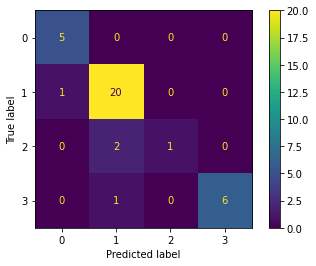

In [42]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Classification Report

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.83      1.00      0.91         5
           3       0.87      0.95      0.91        21
           4       1.00      0.33      0.50         3
           5       1.00      0.86      0.92         7

    accuracy                           0.89        36
   macro avg       0.93      0.79      0.81        36
weighted avg       0.90      0.89      0.88        36



# Splitting data 70/15/15

In [50]:
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,
                                          test_size=.15,
                                          random_state=30)

In [51]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X_train.values,y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [52]:
y_pred=classifier.predict(X_test)

/Users/ashleyridley/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 4  0  0  0]
 [ 1 13  0  0]
 [ 0  2  0  0]
 [ 0  1  0  4]]


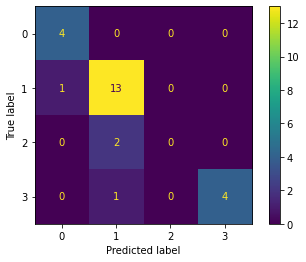

In [55]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.80      1.00      0.89         4
           3       0.81      0.93      0.87        14
           4       0.00      0.00      0.00         2
           5       1.00      0.80      0.89         5

    accuracy                           0.84        25
   macro avg       0.65      0.68      0.66        25
weighted avg       0.78      0.84      0.81        25



/Users/ashleyridley/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ashleyridley/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ashleyridley/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

# Splitting data 80/10/10

In [57]:
X_train,X_rest,y_train,y_rest=train_test_split(X_test,y_test,
                                          test_size=.1,
                                          random_state=20)

In [58]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X_test.values,y_test.values.ravel())

LogisticRegression(max_iter=1000)

In [59]:
y_pred=classifier.predict(X_test)

/Users/ashleyridley/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 4  0  0  0]
 [ 0 14  0  0]
 [ 0  2  0  0]
 [ 0  1  0  4]]


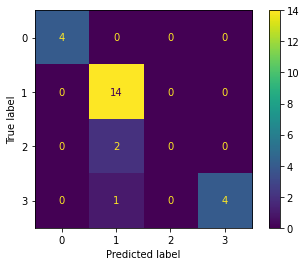

In [61]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00         4
           3       0.82      1.00      0.90        14
           4       0.00      0.00      0.00         2
           5       1.00      0.80      0.89         5

    accuracy                           0.88        25
   macro avg       0.71      0.70      0.70        25
weighted avg       0.82      0.88      0.84        25



/Users/ashleyridley/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ashleyridley/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ashleyridley/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)